In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
dataset=pd.read_csv(r"D:\Data\Loan_prediction\train_loan.csv")

In [62]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
dataset.drop("Loan_ID",axis=1,inplace=True)

In [5]:
dataset.shape

(614, 12)

In [6]:
dataset.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
dataset.fillna(method="pad",inplace=True)

In [8]:
dataset.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
dataset["LoanAmount"]=dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean())

In [11]:
dataset["LoanAmount"].isnull().any()

False

In [12]:
cat_data=[]

In [13]:
for col in dataset:
    if (dataset[col].dtypes==object) and (dataset[col].nunique()<5):
        cat_data.append(col)

In [14]:
cat_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
dataset_cat=dataset[cat_data]

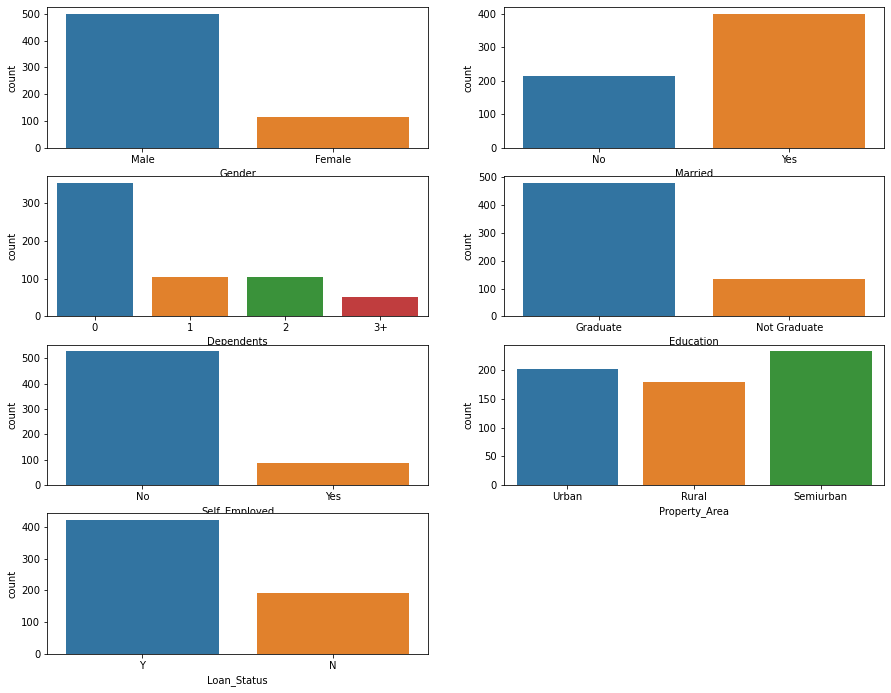

In [16]:
plt.figure(figsize=(15,15))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(5,2,i)
    sns.countplot(dataset_cat[col])

In [17]:
for col in dataset_cat.columns:
    print("==================="+col+"=======================")
    display(pd.crosstab(dataset_cat[col],dataset["Loan_Status"]))

===================Gender=======================


Loan_Status,N,Y
Gender,,
Female,37,77
Male,155,345


===================Married=======================


Loan_Status,N,Y
Married,,
No,79,135
Yes,113,287


===================Dependents=======================


Loan_Status,N,Y
Dependents,,
0,109,245
1,37,67
2,28,77
3+,18,33


===================Education=======================


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


===================Self_Employed=======================


Loan_Status,N,Y
Self_Employed,,
No,166,362
Yes,26,60


===================Property_Area=======================


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


===================Loan_Status=======================


Loan_Status,N,Y
Loan_Status,,
N,192,0
Y,0,422


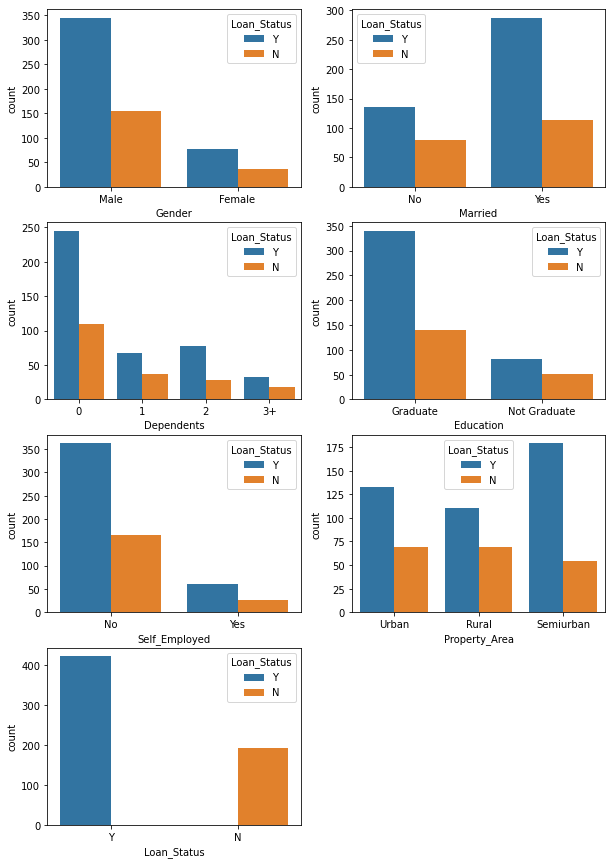

In [18]:
plt.figure(figsize=(10,15))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(4,2,i)
    sns.countplot(dataset_cat[col],hue=dataset["Loan_Status"])
  


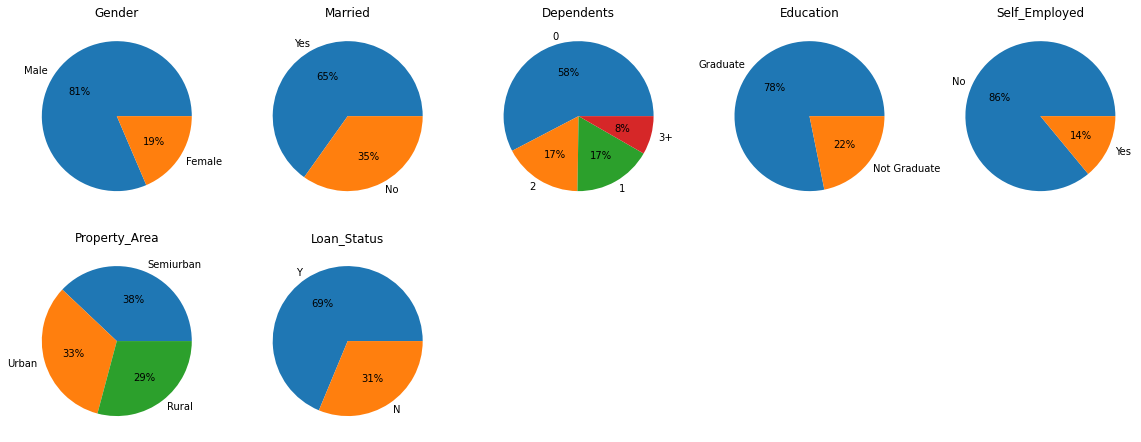

In [19]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(5,5,i)
    plt.pie(dataset_cat[col].value_counts(),labels=dataset_cat[col].value_counts().index,autopct="%1.f%%")
    plt.title(col)

In [20]:
dataset_cat=dataset[cat_data]

In [21]:
num_data=[]

In [22]:
for col in dataset:
    if (dataset[col].dtypes!=object) and (dataset[col].nunique()>5):
        num_data.append(col)

In [23]:
dataset_num=dataset[num_data]

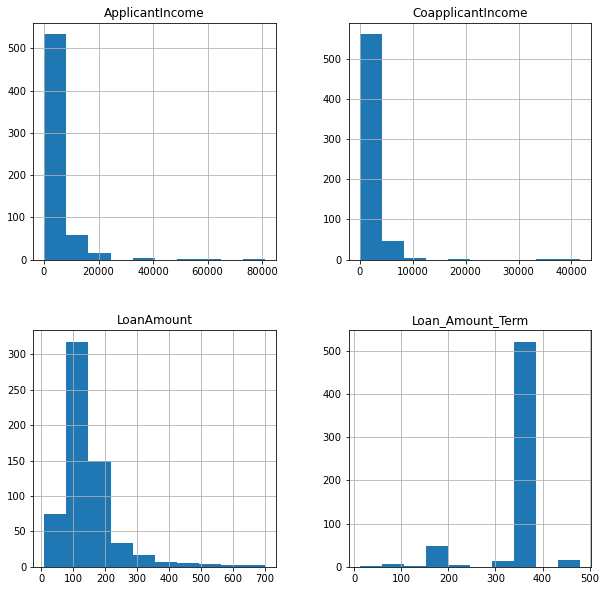

In [24]:
dataset_num.hist(figsize=(10,10))
plt.show()

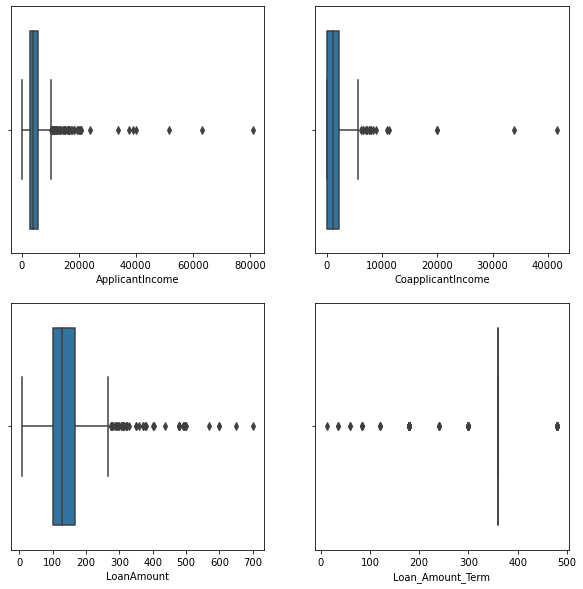

In [25]:
plt.figure(figsize=(10,10))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(dataset_num[col])
  


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


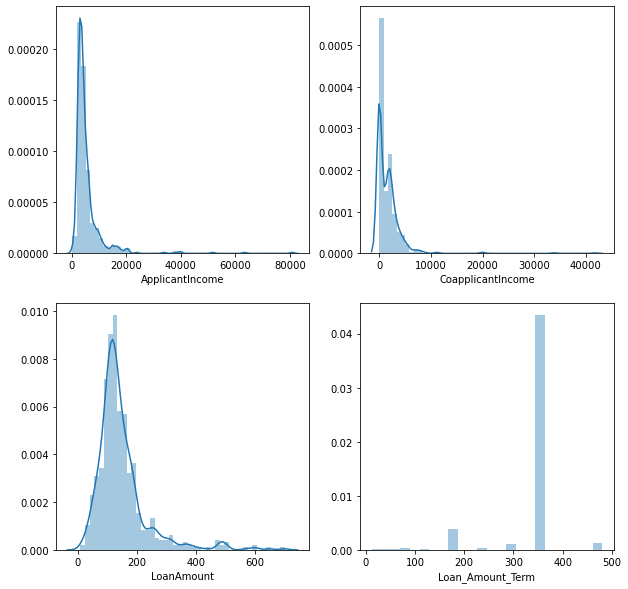

In [26]:
plt.figure(figsize=(10,10))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.distplot(dataset_num[col])

# num_data vs target

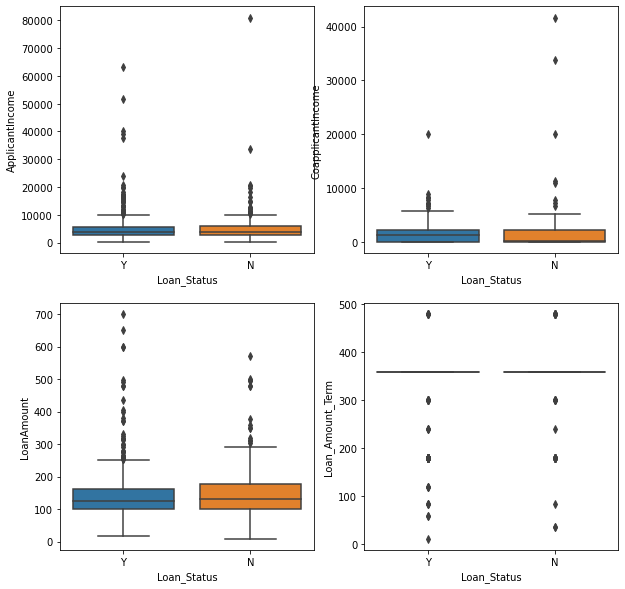

In [27]:
plt.figure(figsize=(10,10))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(dataset["Loan_Status"],dataset_num[col])

In [28]:
for col in dataset_cat.columns:
    print(col,":",dataset_cat[col].unique())

Gender : ['Male' 'Female']
Married : ['No' 'Yes']
Dependents : ['0' '1' '2' '3+']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes']
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


# outliers

In [29]:
for col in dataset_num.columns:
    q1=dataset_num[col].describe()["25%"]
    q3=dataset_num[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    count=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)].shape[0]
    p=count/614*100
if (count>0):
            print("======================"+col+"======================")
            print("count",count)
            print("Percentage",p)

======================Loan_Amount_Term======================
count 93
Percentage 15.146579804560261


In [30]:
outliers=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)]

In [31]:
lb_dict={}.fromkeys(dataset_num[(dataset_num["Loan_Amount_Term"]<lb)]["Loan_Amount_Term"],lb)

In [32]:
ub_dict={}.fromkeys(dataset_num[(dataset_num["Loan_Amount_Term"]>ub)]["Loan_Amount_Term"],lb)

In [33]:
lb_dict.update(ub_dict)

In [34]:
dataset_num["Loan_Amount_Term"]=dataset_num["Loan_Amount_Term"].replace(lb_dict)

<ipython-input-34-dfaf1f915860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_num["Loan_Amount_Term"]=dataset_num["Loan_Amount_Term"].replace(lb_dict)


# Data Encoding

In [35]:
ordinal_data=dataset_cat[["Education","Property_Area"]]

In [36]:
ordinal_data

,Education,Property_Area
0,Graduate,Urban
1,Graduate,Rural
2,Graduate,Urban
3,Not Graduate,Urban
4,Graduate,Urban
...,...,...
609,Graduate,Rural
610,Graduate,Rural
611,Graduate,Urban
612,Graduate,Urban


In [37]:
ordinal_map={"Education":{'Graduate':1,'Not Graduate':2},"Property_Area":{'Urban':1,'Rural':2, 'Semiurban':3}}

In [38]:
dataset["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
for col in ordinal_data.columns:
    ordinal_data[col]=ordinal_data[col].map(ordinal_map[col])

<ipython-input-39-a44d95d49a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_data[col]=ordinal_data[col].map(ordinal_map[col])


In [40]:
ordinal_data

,Education,Property_Area
0,1,1
1,1,2
2,1,1
3,2,1
4,1,1
...,...,...
609,1,2
610,1,2
611,1,1
612,1,1


In [41]:
nominal_data=dataset_cat

In [42]:
nominal_data=nominal_data.drop(["Education","Property_Area"],axis=1)

In [43]:
nominal_data=pd.get_dummies(nominal_data,drop_first=True)

In [44]:
nominal_data

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Loan_Status_Y
0,1,0,0,0,0,0,1
1,1,1,1,0,0,0,0
2,1,1,0,0,0,1,1
3,1,1,0,0,0,0,1
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,0,0,1,0,1
611,1,1,1,0,0,0,1
612,1,1,0,1,0,0,1


In [45]:
dataset_cat=pd.concat([nominal_data,ordinal_data],axis=1)

In [46]:
dataset_preprocessed=pd.concat([dataset_cat,dataset_num],axis=1)

In [47]:
dataset_preprocessed=dataset_preprocessed[["Gender_Male","Married_Yes","Dependents_1","Dependents_2","Dependents_3+","Self_Employed_Yes","Education","Property_Area",
"ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Loan_Status_Y"]]

In [48]:
dataset_preprocessed=dataset_preprocessed.astype('float')

In [49]:
x=dataset_preprocessed.iloc[:,0:12].values

In [50]:
y=dataset_preprocessed.iloc[:,12]

# Spliting the data 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc=StandardScaler()

In [55]:
x_train=sc.fit_transform(x_train)

In [56]:
x_test=sc.transform(x_test)

# Building a model

In [57]:
from sklearn.linear_model import LogisticRegression
lor_model=LogisticRegression()
lor_model.fit(x_train,y_train)
y_predlor=lor_model.predict(x_test)

from sklearn.metrics import accuracy_score
acc_lor=accuracy_score(y_test,y_predlor)

print("Accuracy_Score",acc_lor)

Accuracy_Score 0.6585365853658537


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predlor))
print(classification_report(y_test,y_predlor))

[[ 1 42]
 [ 0 80]]
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.05        43
         1.0       0.66      1.00      0.79        80

    accuracy                           0.66       123
   macro avg       0.83      0.51      0.42       123
weighted avg       0.78      0.66      0.53       123



# save the model

In [59]:
import joblib

In [60]:
joblib.dump(lor_model,"loan.pkl")

['loan.pkl']